# 국가(대륙)별 / 상품군별 온라인 쇼핑 해외직접판매액

### K-Beauty는 성장하고 있을까? 해외 직접판매 시 어느 국가로 판매전략을 세우면 좋을까?
* e: 추정치, p: 잠정치, -: 자료없음, ...: 미상자료, x: 비밀번호, ▽: 시계열 분열(단위 : 백만원)

# 필요 라이브러리 가져오기

In [1]:
# 라이브러리 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 시각화를 위한 폰트설정
# 구글코랩 사용시 폰트 설정 필요
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보임
# 한글 출력 가능하게 폰트설정
# 설치 후 런타임 재실행 필수!
# 나눔고딕 설치 (이 코드 사용 시 아래있는 폰트 로드할 경우 colab에서 오류발생 아래의 폰트 설정 꼭 주석처리!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Colab의 한글폰트 설정
plt.rc('font', family = 'NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus = False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# 레티나 설정 시 글씨가 좀 더 선명히 보임
# 폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [4]:
# 코랩에서 구글드라이브 마운트하여 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 내 드라이브 내의 파일을 불러올 때 경로 /content/drive/My Drive/를 앞에 붙여주기
# encoding='utf-8'이 안될 때는 encoding='CP949' 사용.
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_15-20.csv', encoding='CP949')
df_raw.shape

(450, 27)

In [6]:
# "국가(대륙)별" 데이터 빈도수 확인
df_raw["국가(대륙)별"].value_counts()

중국            45
중동            45
기타            45
미국            45
유럽연합(EU)      45
일본            45
아세안(ASEAN)    45
중남미           45
대양주           45
합계            45
Name: 국가(대륙)별, dtype: int64

In [7]:
# 미국 데이터만 따로 출력
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4 p)
45,미국,합계,계,39945,26654,28647,37392,38179,36831,35290,44421,45169,40976,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848,48277,64225,54990,67535
46,미국,합계,면세점,-,-,-,-,-,-,-,-,8160,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481,698,339,81,67
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,-,37009,31793,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367,47579,63886,54909,67468
48,미국,컴퓨터 및 주변기기,계,1469,1393,2166,2362,2533,2121,1704,1531,1054,946,791,854,2033,1553,1784,1774,1298,1408,1653,1382,1182,1630,1923,1386
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,-,1054,946,791,854,2033,1553,1784,1773,1298,1408,1653,1382,1182,1630,1923,1386
51,미국,가전·전자·통신기기,계,4397,3589,2982,3286,3571,2921,2744,3354,2730,2425,2575,2394,1737,1716,1723,1886,1845,1837,3166,1785,1830,2824,3286,2178
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,-,18,23,29,32,65,38,72,52,66,116,107,49,12,2,5,1
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,-,2712,2402,2546,2362,1672,1678,1651,1834,1779,1721,3059,1736,1818,2822,3281,2177
54,미국,소프트웨어,계,182,113,163,116,147,103,82,83,67,45,37,125,175,251,172,269,88,156,118,338,135,182,137,314


# 분석과 시각화를 위한 tidy data 만들기

In [8]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2015 1/4', '2015 2/4', '2015 3/4',
       '2015 4/4', '2016 1/4', '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4',
       '2017 2/4', '2017 3/4', '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4',
       '2018 4/4', '2019 1/4', '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4',
       '2020 2/4', '2020 3/4', '2020 4/4 p)'],
      dtype='object')

In [9]:
df = df_raw.melt(id_vars = ["국가(대륙)별", "상품군별", "판매유형별"], var_name = "기간", value_name= "백만원")
df.shape

(10800, 5)

In [10]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2015 1/4,269101
1,합계,합계,면세점,2015 1/4,-
2,합계,합계,면세점 이외,2015 1/4,-
3,합계,컴퓨터 및 주변기기,계,2015 1/4,2903
4,합계,컴퓨터 및 주변기기,면세점,2015 1/4,-


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


# 데이터 전처리

### 기간에서 연도를 분리

In [12]:
# "2019 4/4 p)".split() : 공백으로 데이터 분리
# "2019 4/4 p)".split()[0] : 첫번째 인덱스 '2019' 가져오기
# type("2019 4/4 p)".split()[0]) : 데이터 타입 확인 <- 결과 : str
# integer 형으로 변경
int("2019 4/4 p)".split()[0])

2019

In [13]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2015 1/4,269101,2015
1,합계,합계,면세점,2015 1/4,-,2015
2,합계,합계,면세점 이외,2015 1/4,-,2015
3,합계,컴퓨터 및 주변기기,계,2015 1/4,2903,2015
4,합계,컴퓨터 및 주변기기,면세점,2015 1/4,-,2015


In [14]:
"2019 1/4 p)".split()[1].split("/")[0]

'1'

In [15]:
# 기간에서 분기만 분리
# 분기 컬럼 만들기
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2015 1/4,269101,2015,1
1,합계,합계,면세점,2015 1/4,-,2015,1
2,합계,합계,면세점 이외,2015 1/4,-,2015,1
3,합계,컴퓨터 및 주변기기,계,2015 1/4,2903,2015,1
4,합계,컴퓨터 및 주변기기,면세점,2015 1/4,-,2015,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경

In [16]:
# - 문자를 결측치로 변경하고 float타입으로 변경
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2015 1/4,269101.0,2015,1
1,합계,합계,면세점,2015 1/4,NaN,2015,1
2,합계,합계,면세점 이외,2015 1/4,NaN,2015,1
3,합계,컴퓨터 및 주변기기,계,2015 1/4,2903.0,2015,1
4,합계,컴퓨터 및 주변기기,면세점,2015 1/4,NaN,2015,1


### 필요없는 데이터 제거

In [17]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2015 1/4,1469.0,2015,1
49,미국,컴퓨터 및 주변기기,면세점,2015 1/4,NaN,2015,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2015 1/4,NaN,2015,1
51,미국,가전·전자·통신기기,계,2015 1/4,4397.0,2015,1
52,미국,가전·전자·통신기기,면세점,2015 1/4,NaN,2015,1


In [18]:
# info로 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      7056 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [19]:
# 결측치 확인
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        2016
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

### 전체 상품군 판매액

In [20]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에 
# 판매유형별 == "계" 데이터만 출력해야 평균값을 구하는 그래프에서 올바른 값을 표현 가능.
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2015 1/4,1469.0,2015,1
51,미국,가전·전자·통신기기,계,2015 1/4,4397.0,2015,1
54,미국,소프트웨어,계,2015 1/4,182.0,2015,1
57,미국,서 적,계,2015 1/4,1074.0,2015,1
60,미국,사무·문구,계,2015 1/4,568.0,2015,1


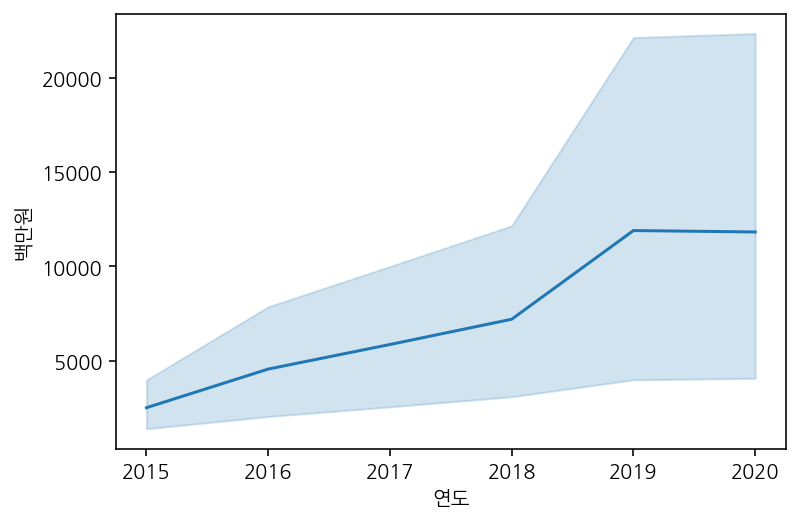

In [21]:
# 연도, 판매액 lineplot으로 출력
sns.lineplot(data = df_total, x = "연도", y = "백만원")

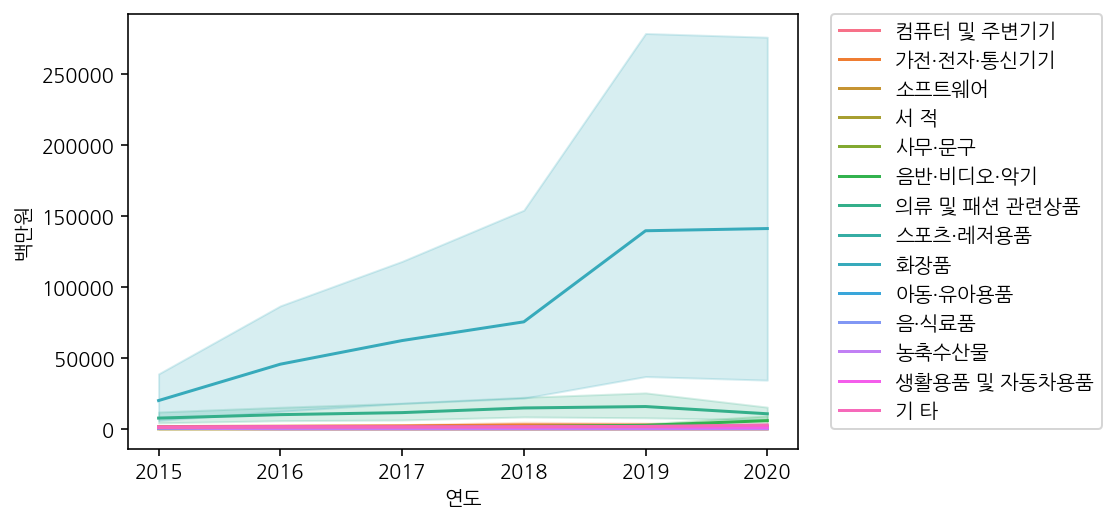

In [24]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별")
# legend 값을 그래프 밖에 그리기
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

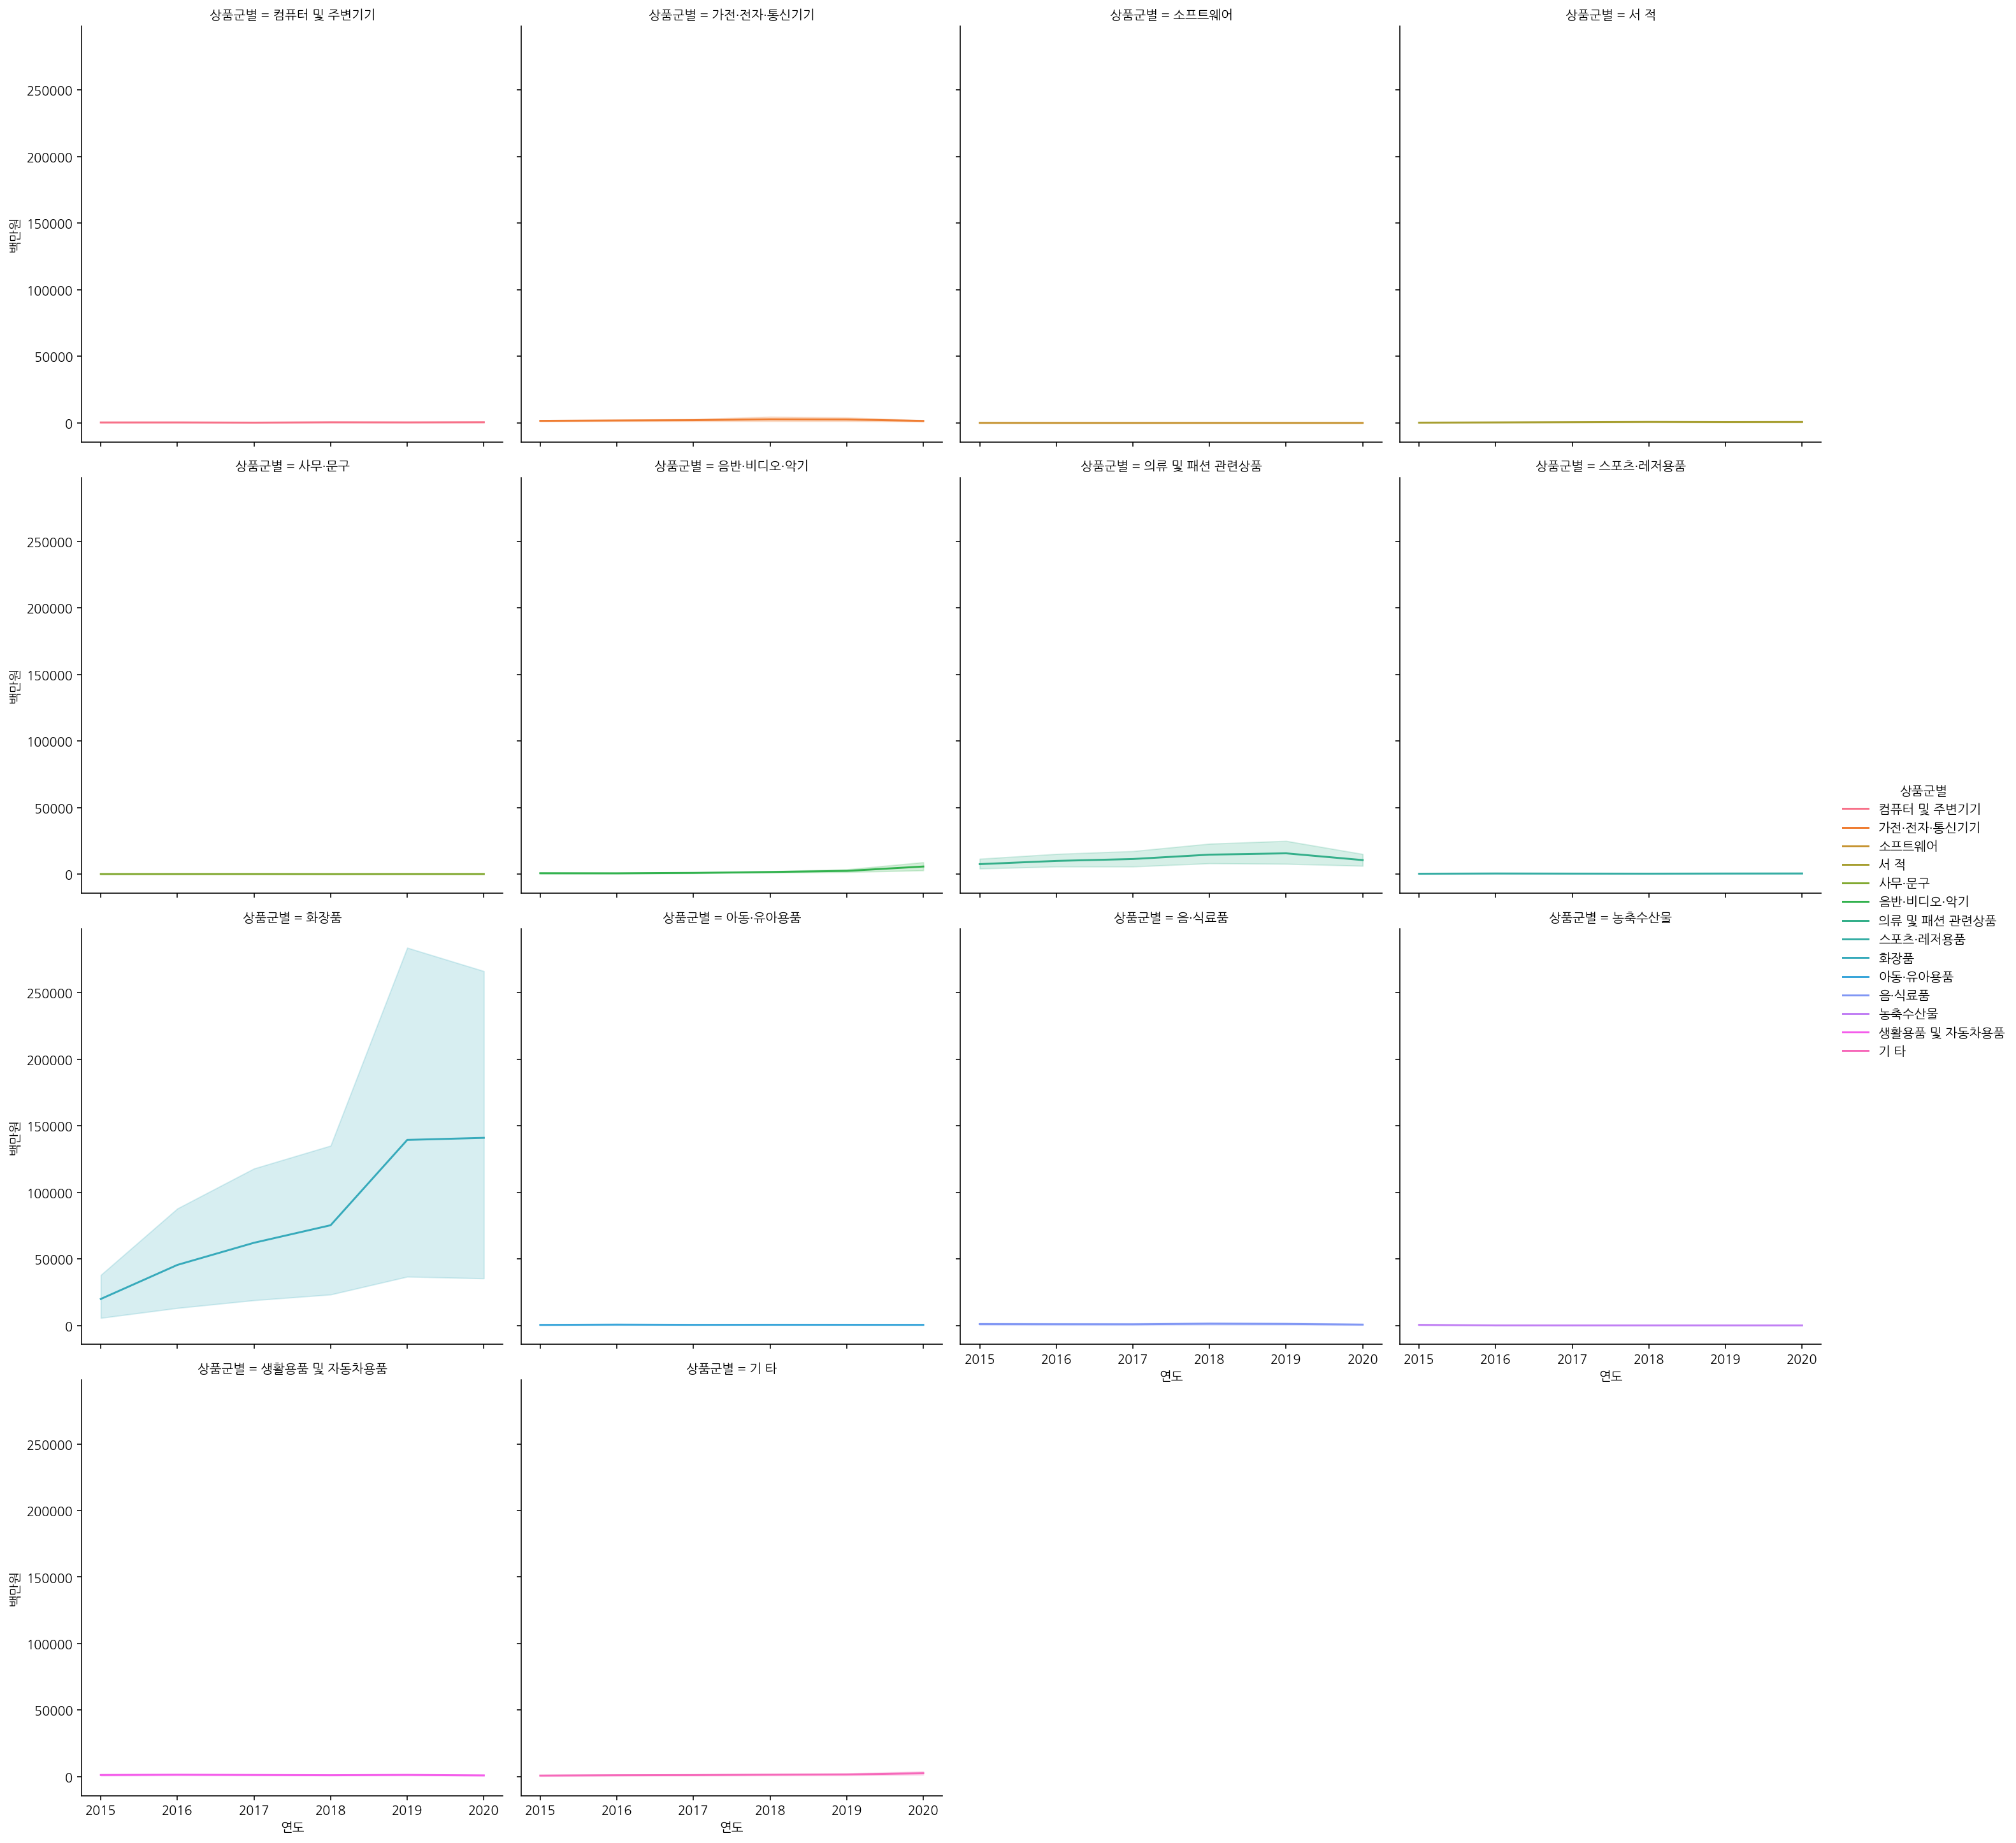

In [26]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시
sns.relplot(data = df_total, x = "연도", y = "백만원", 
            hue = "상품군별", kind = "line", col = "상품군별", col_wrap = 4)

In [39]:
# isin을 사용해 화장품만 제외하고 df_sub 이란  변수에 담기
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy()
df_sub["상품군별"].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '스포츠·레저용품', '아동·유아용품', '음·식료품', '농축수산물', '생활용품 및 자동차용품', '기 타'],
      dtype=object)

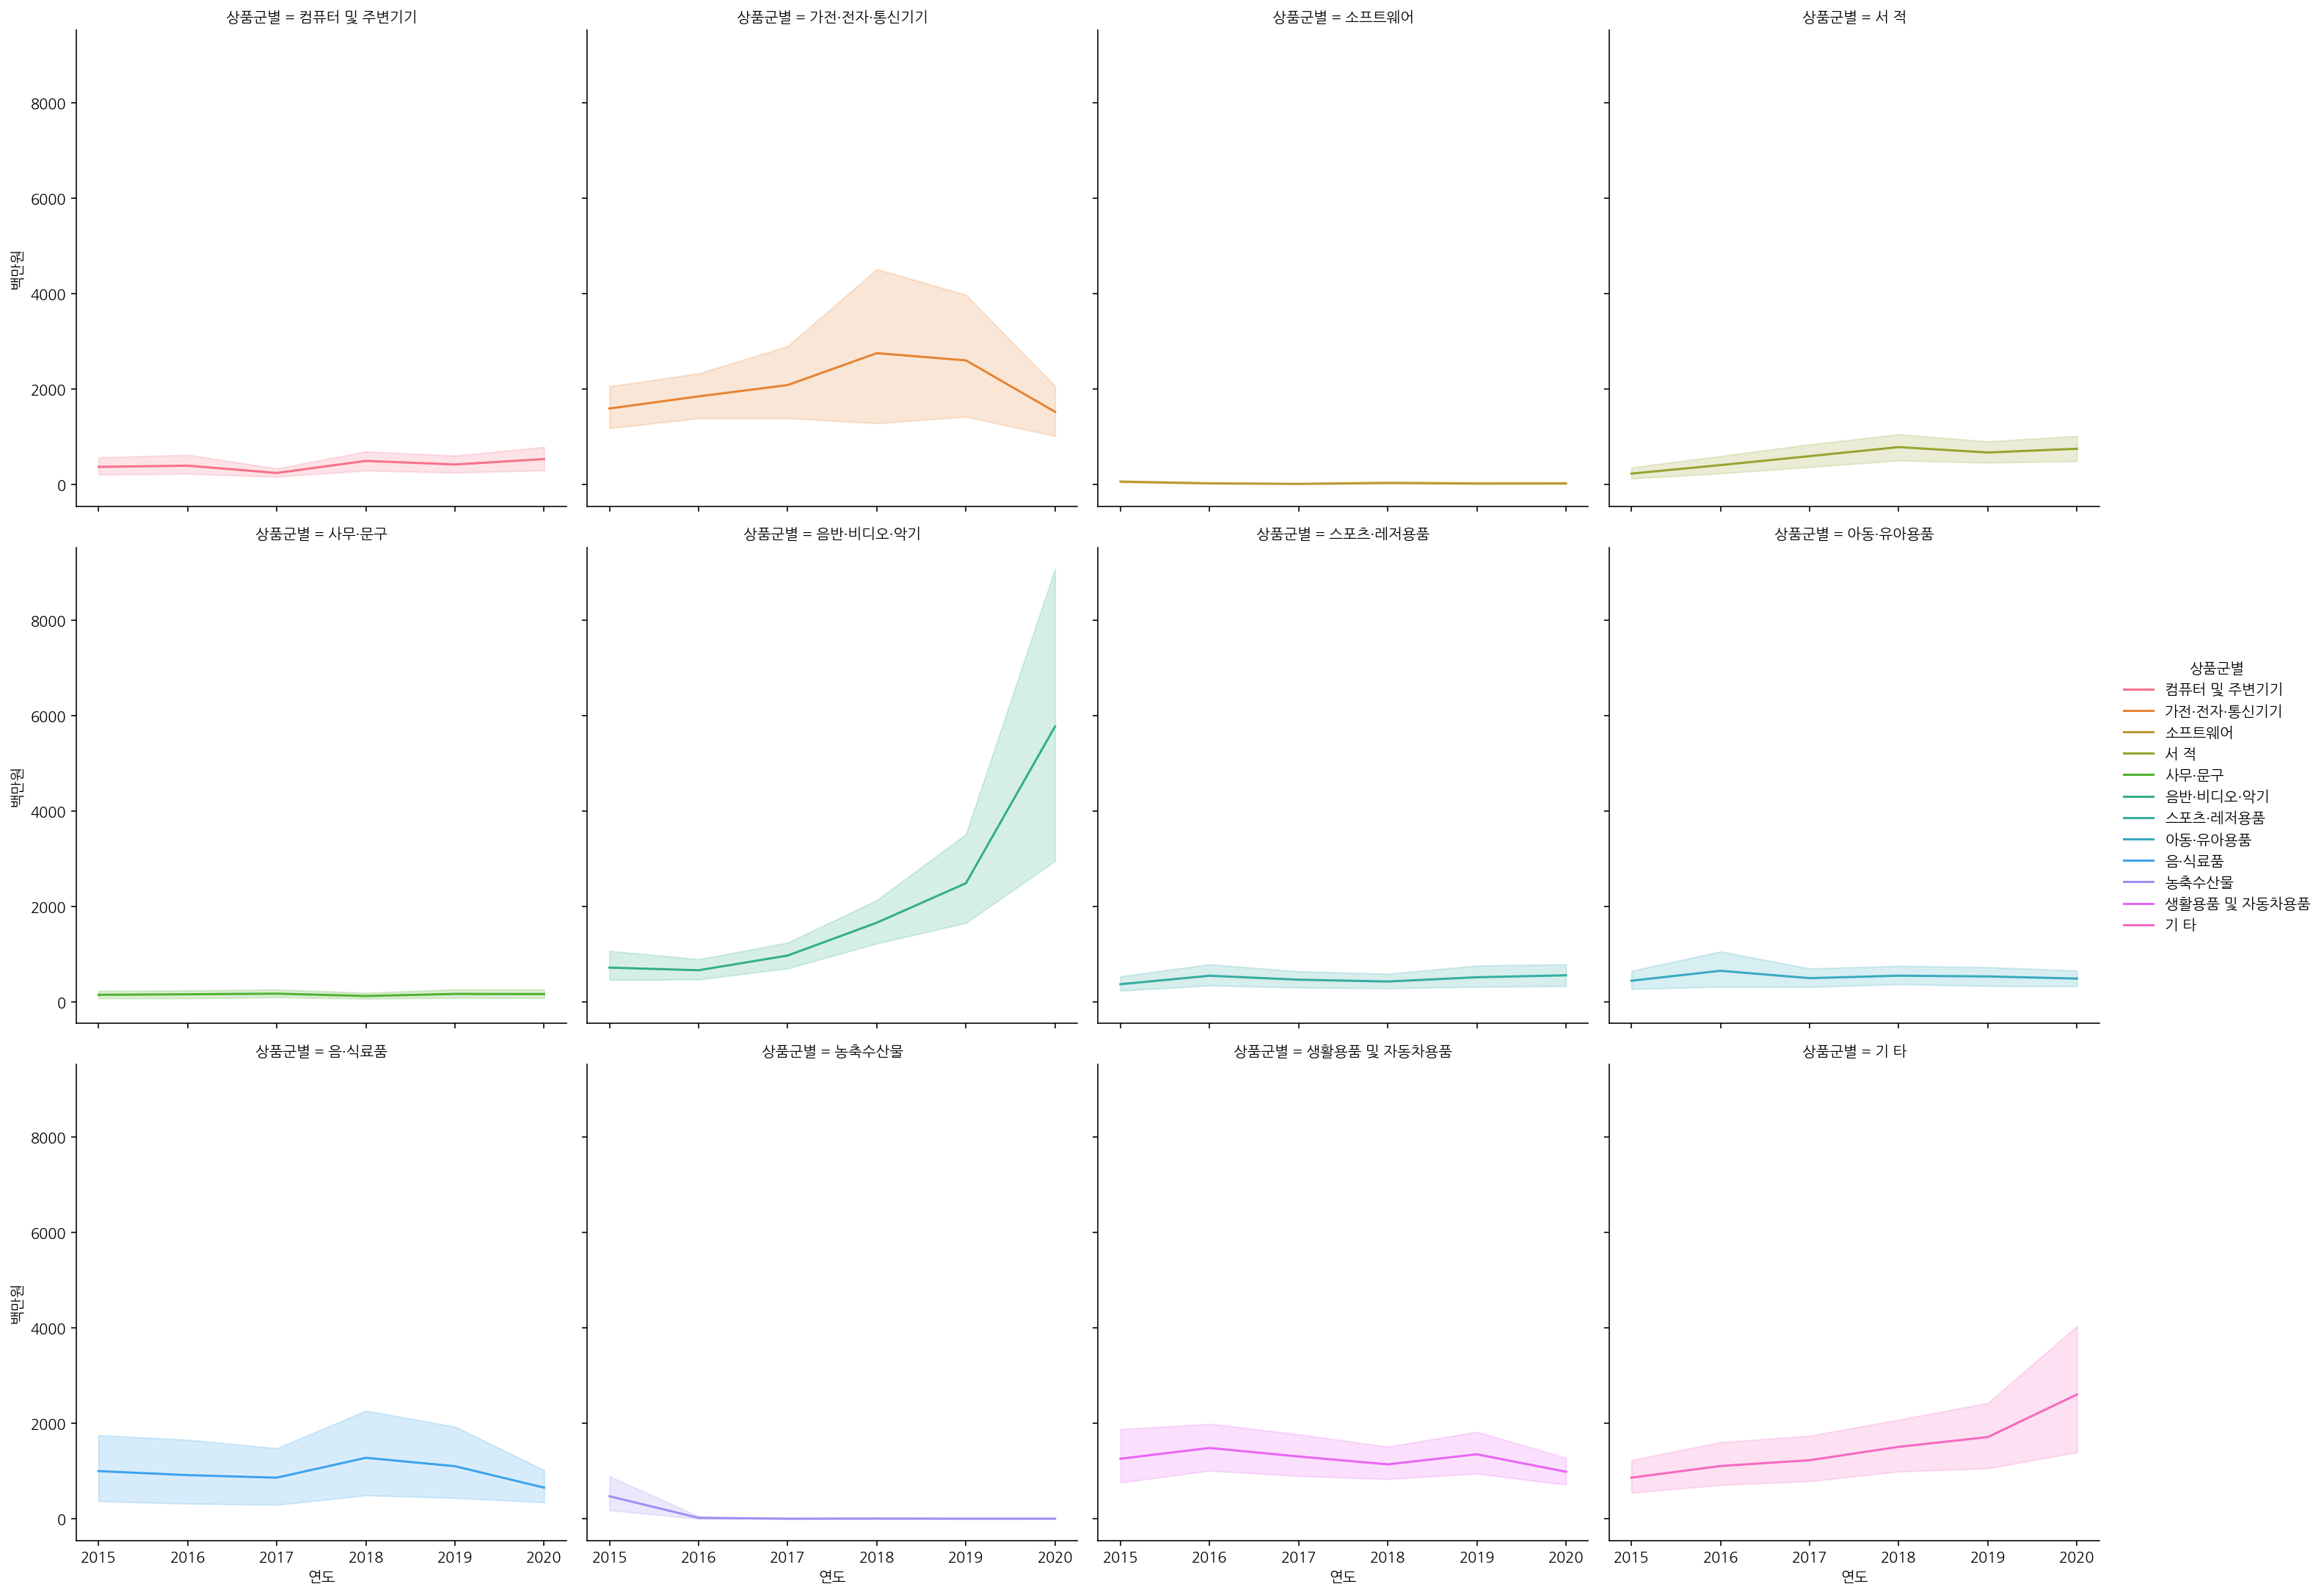

In [40]:
# 연도별 판매액을 상품군별로 replot을 활용해 서브플롯으로 출력
sns.relplot(data = df_sub, x = "연도", y = "백만원", hue = "상품군별", col = "상품군별", col_wrap = 4, kind = "line")

### 화장품의 온라인쇼핑 해외직접판매액

In [42]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 담기
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2015 1/4,11223.0,2015,1
117,중국,화장품,계,2015 1/4,119497.0,2015,1
162,일본,화장품,계,2015 1/4,874.0,2015,1
207,아세안(ASEAN),화장품,계,2015 1/4,1452.0,2015,1
252,유럽연합(EU),화장품,계,2015 1/4,852.0,2015,1


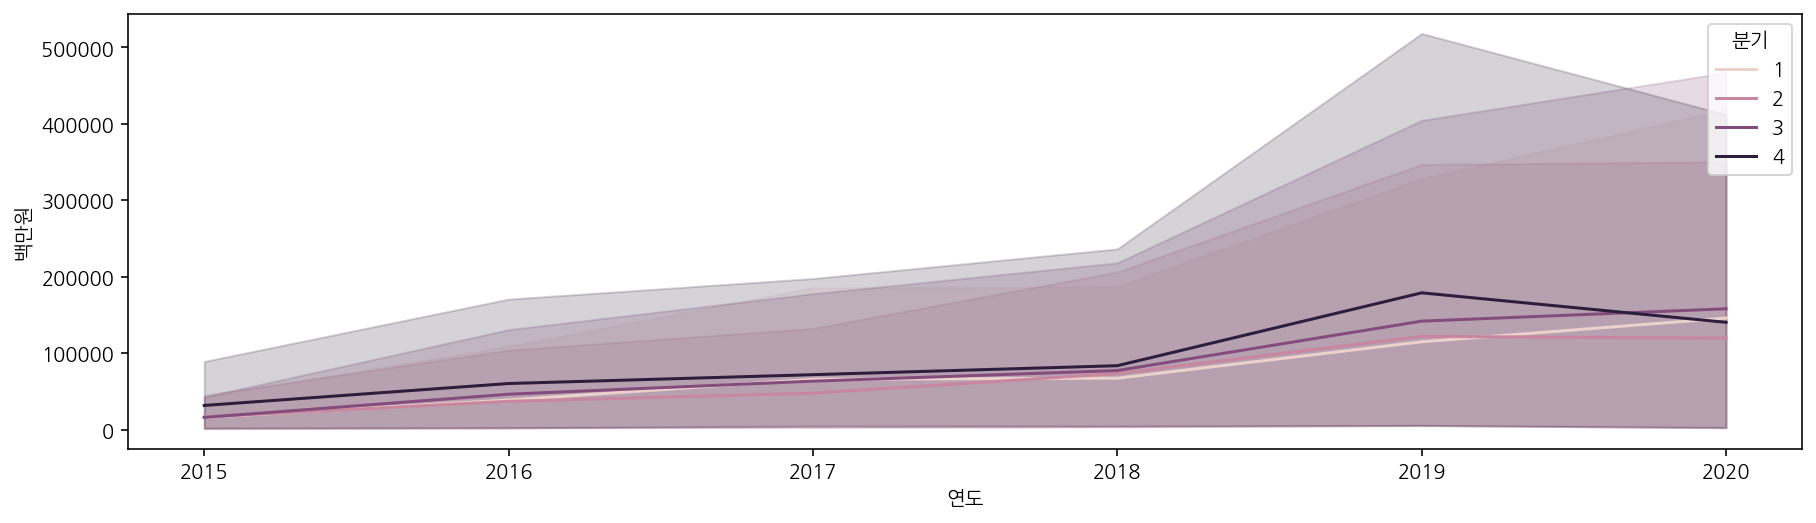

In [45]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현
plt.figure(figsize=(15,4))
sns.lineplot(data = df_cosmetic, x = "연도", y = "백만원", hue = "분기")

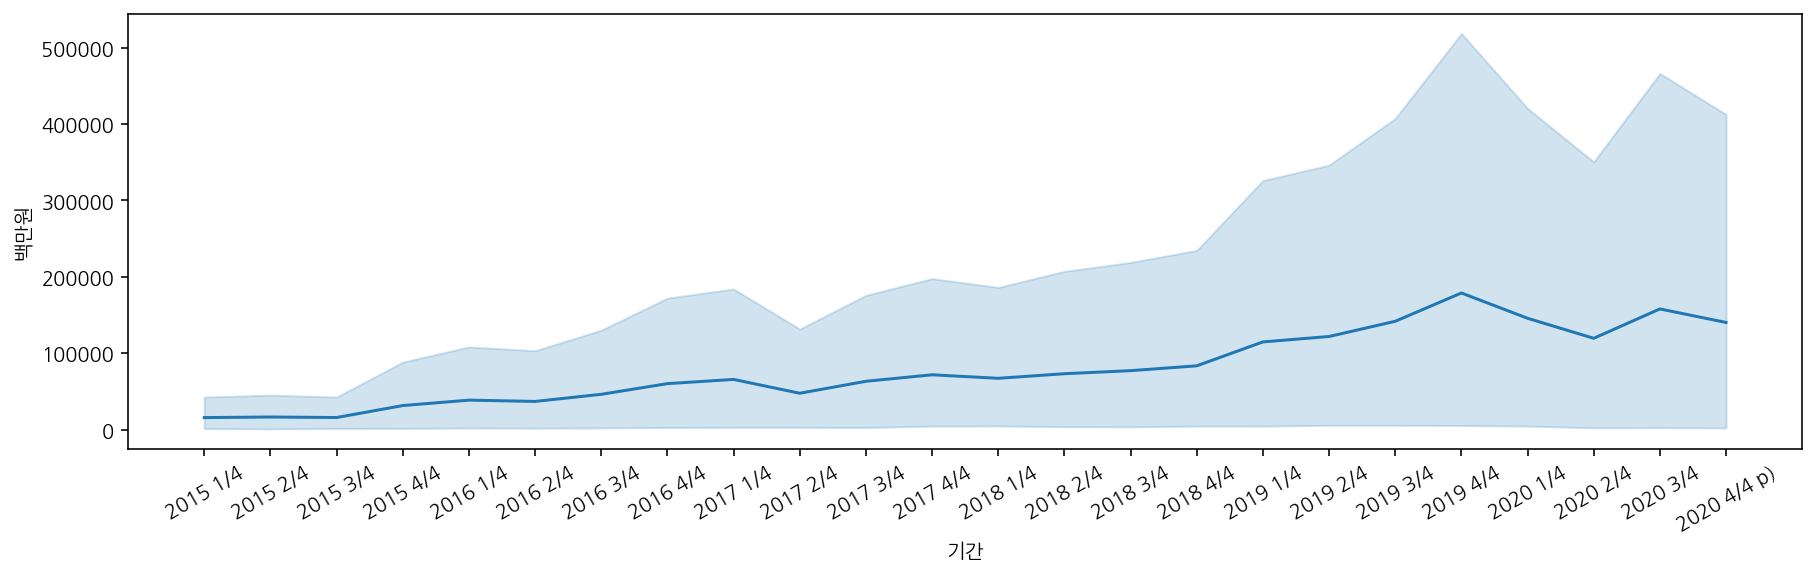

In [47]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화
plt.figure(figsize=(15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic, x = "기간", y = "백만원")

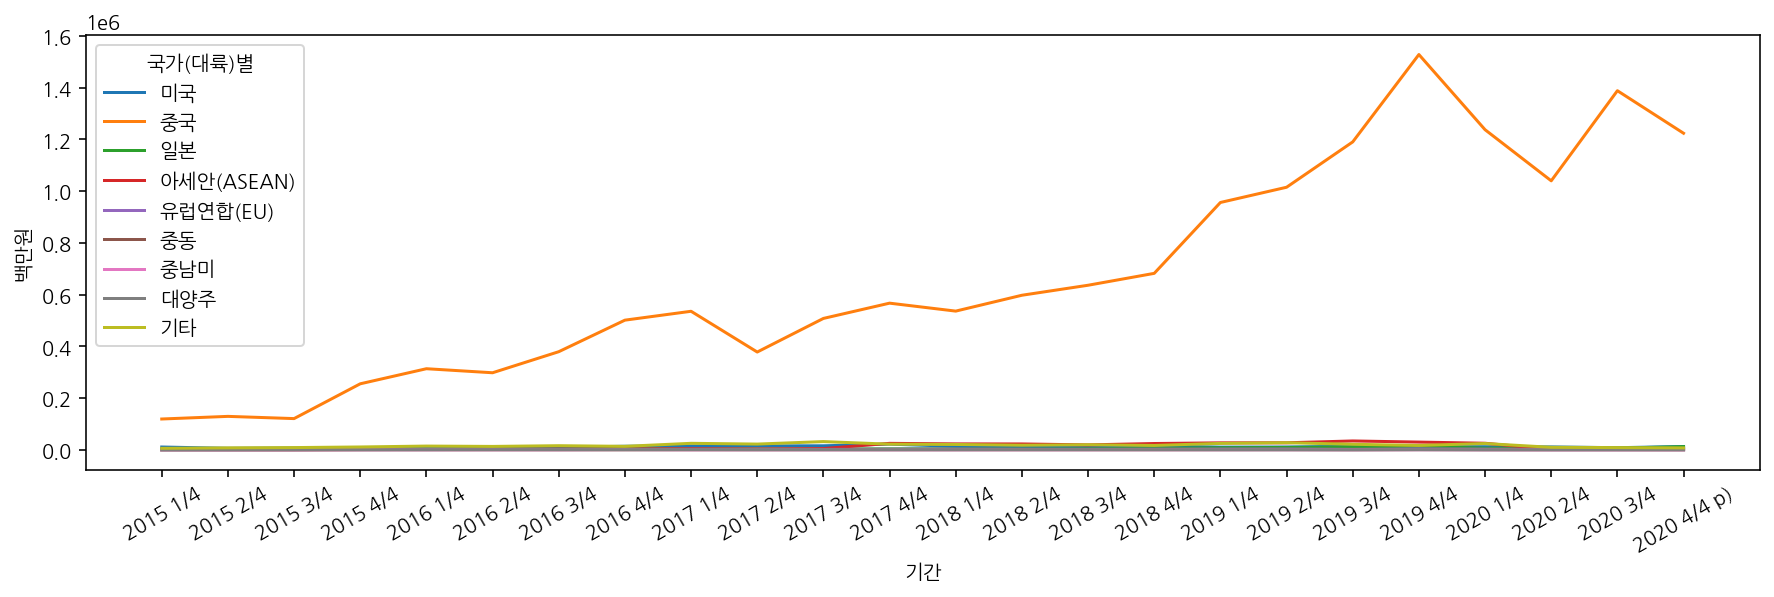

In [48]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고, "국가(대륙)별"로 다른 색상으로 표시
plt.figure(figsize=(15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic, x = "기간", y = "백만원", hue = "국가(대륙)별")

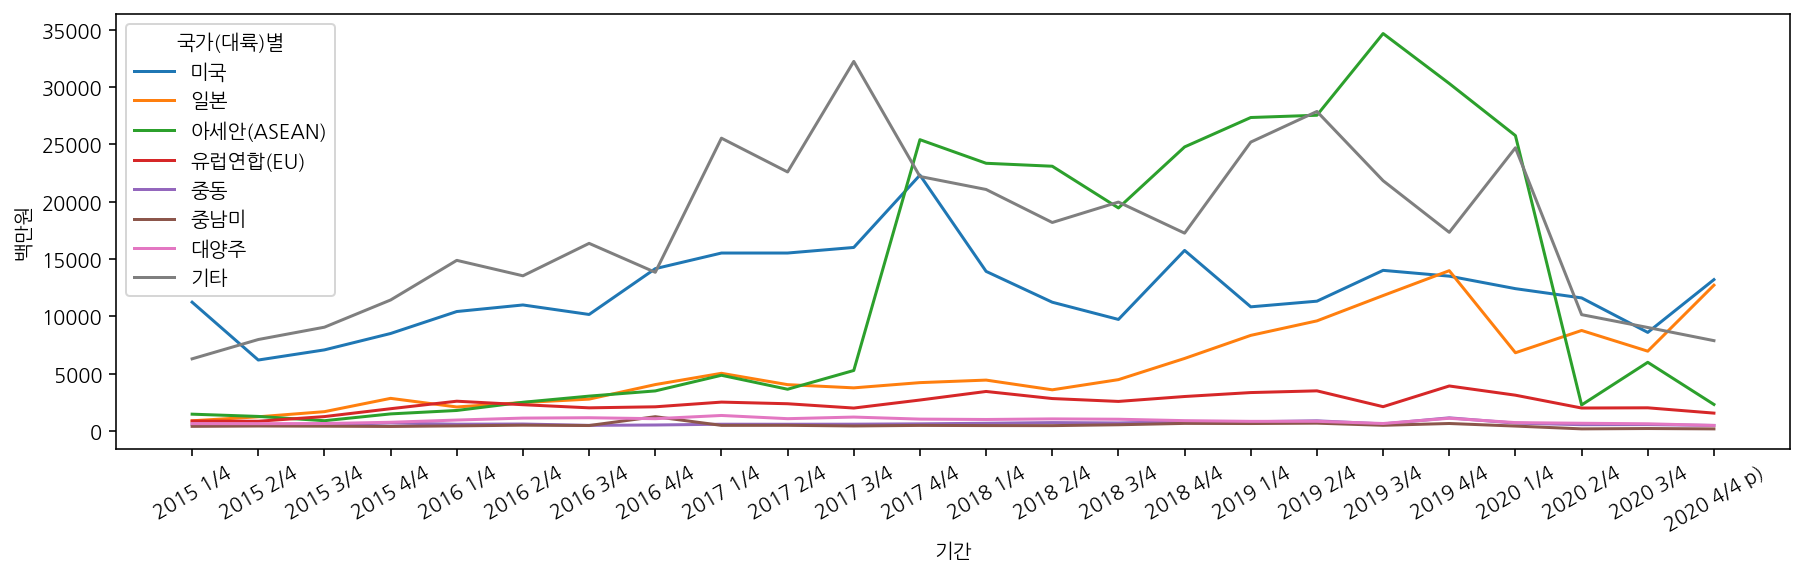

In [49]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고, "국가(대륙)별"로 다른 색상으로 표시
# 중국 제외
plt.figure(figsize=(15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], 
             x = "기간", y = "백만원", hue = "국가(대륙)별")

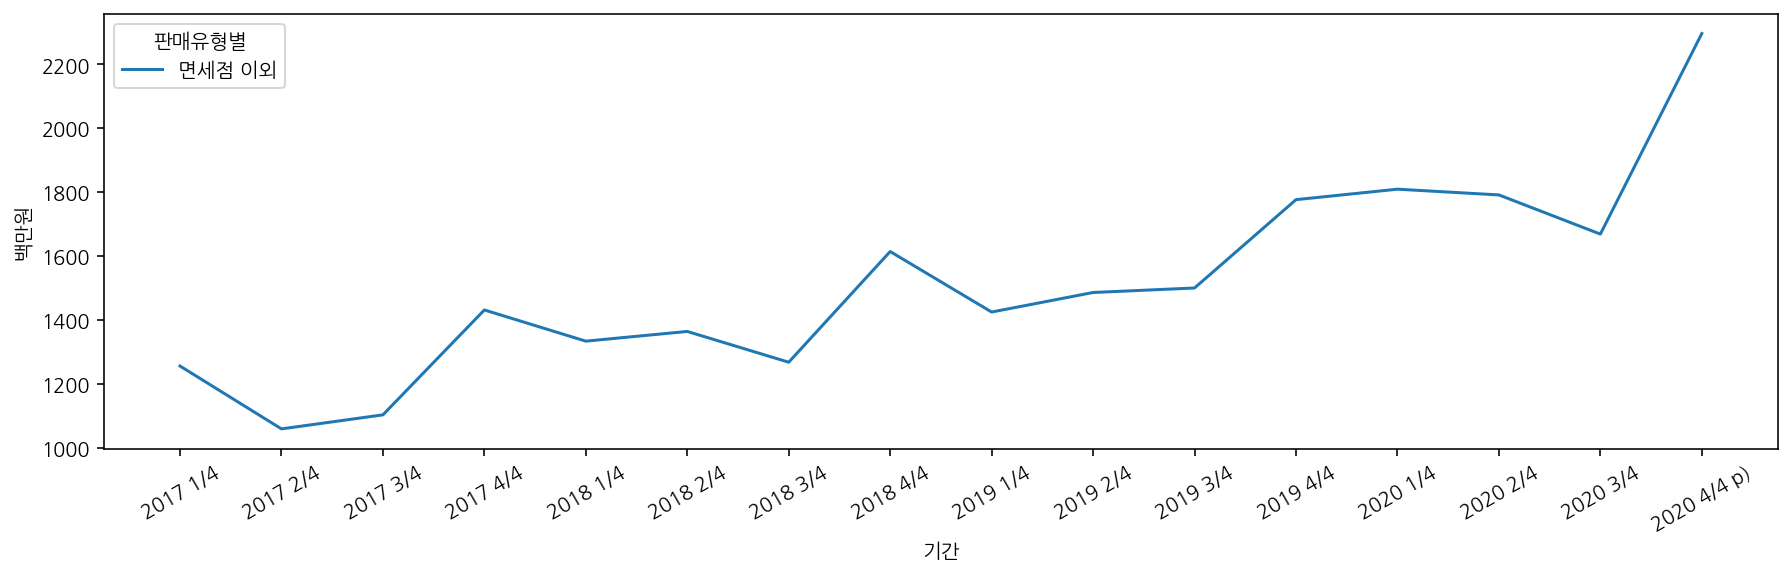

In [51]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고, "판매유형별"로 다른 색상으로 표시
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()

plt.figure(figsize=(15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_sub, x = "기간", y = "백만원", hue = "판매유형별", ci = None)

### 의류 및 패션 관련상품 온라인쇼핑 해외직접판매액

In [54]:
# df_fashion이란 변수에 의류데이터만 가져와 따로 담기
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2015 1/4,8602.0,2015,1
111,중국,의류 및 패션 관련상품,계,2015 1/4,29737.0,2015,1
156,일본,의류 및 패션 관련상품,계,2015 1/4,12456.0,2015,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2015 1/4,4018.0,2015,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2015 1/4,676.0,2015,1


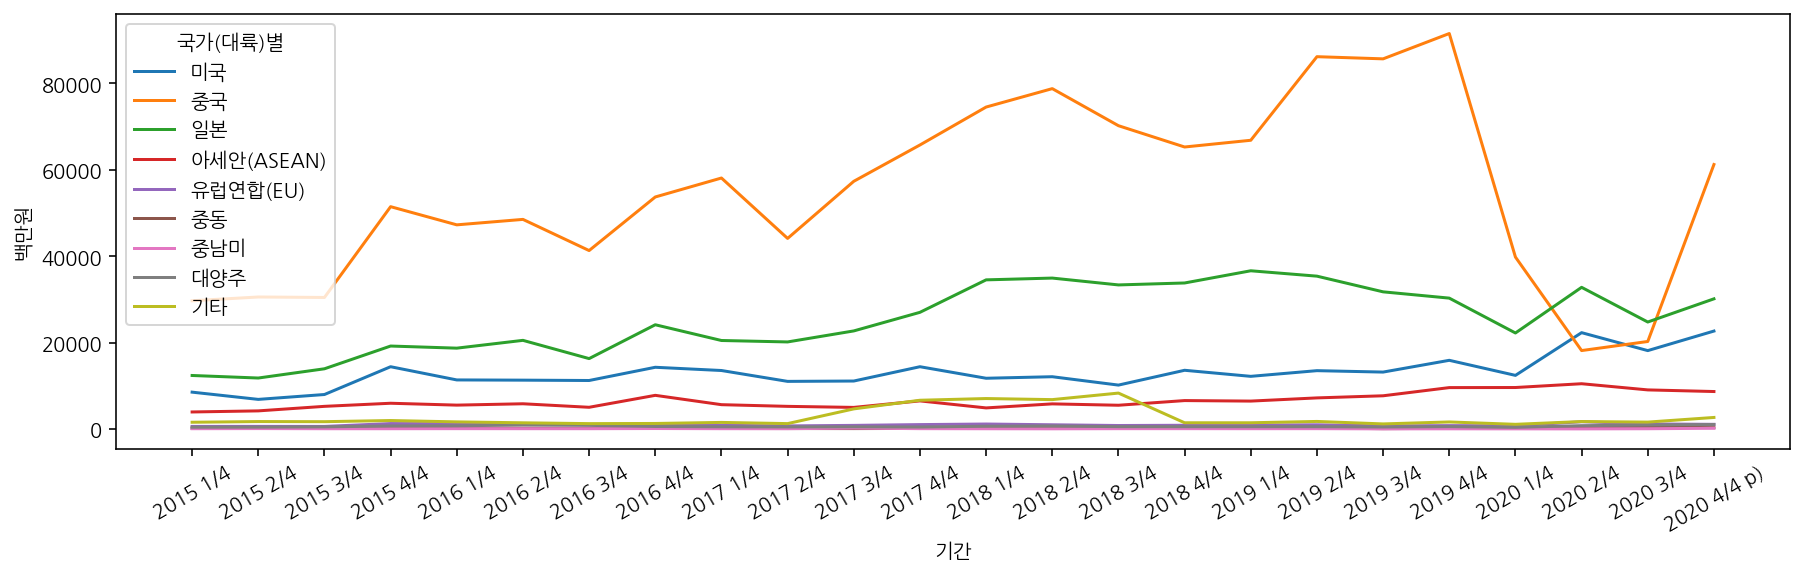

In [57]:
# "의류 및 패션 관련상품" 판매액에 대한 기간별 금액 데이터 시각화
# "국가(대륙)별"로 다른 색상으로 표시
plt.figure(figsize=(15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion, x = "기간", y = "백만원", hue = "국가(대륙)별")

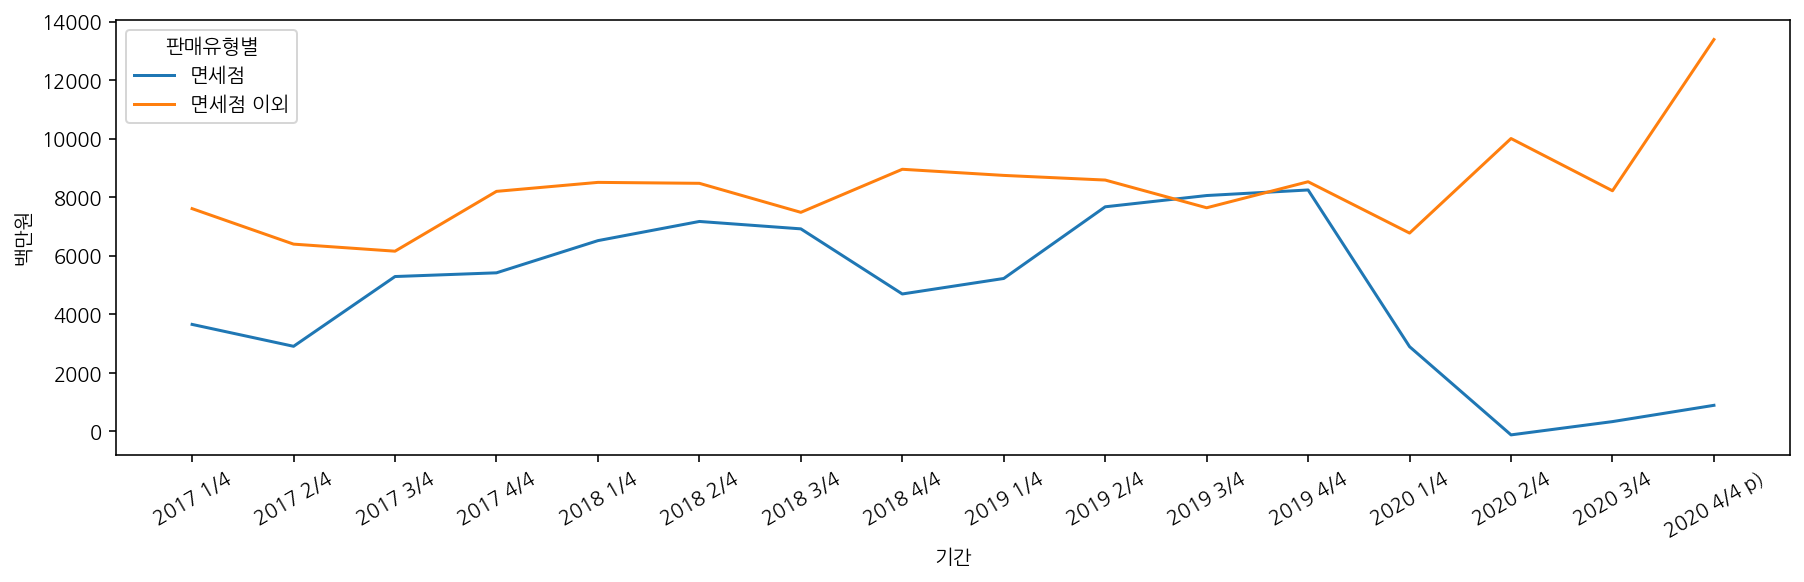

In [60]:
# "의류 및 패션 관련상품" 판매액에 대한 기간별 금액 데이터 시각화
# "판매유형별"로 다른색상으로 표시
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion2, x = "기간", y = "백만원", hue = "판매유형별", ci = None)

### 데이터 집계

In [76]:
# 피봇테이블로 "국가(대륙)별", "연도"별 합계 금액 표 형태로 출력
result = df_fashion.pivot_table(index = "국가(대륙)별", columns = "연도", 
                       values = "백만원", aggfunc = "sum")
result

연도,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,
기타,7248.0,5918.0,14387.0,23901.0,6309.0,7386.0
대양주,2349.0,3401.0,2266.0,2725.0,2387.0,3414.0
미국,38066.0,48451.0,50353.0,47875.0,55035.0,75778.0
아세안(ASEAN),19639.0,24478.0,22671.0,23068.0,31217.0,38088.0
유럽연합(EU),3374.0,4899.0,3736.0,4114.0,3694.0,4978.0
일본,57594.0,79905.0,90584.0,136800.0,134243.0,110129.0
중국,142339.0,190932.0,225407.0,288848.0,330254.0,139624.0
중남미,616.0,649.0,762.0,576.0,543.0,610.0
중동,1018.0,968.0,772.0,879.0,924.0,1727.0


### 연산결과 시각화

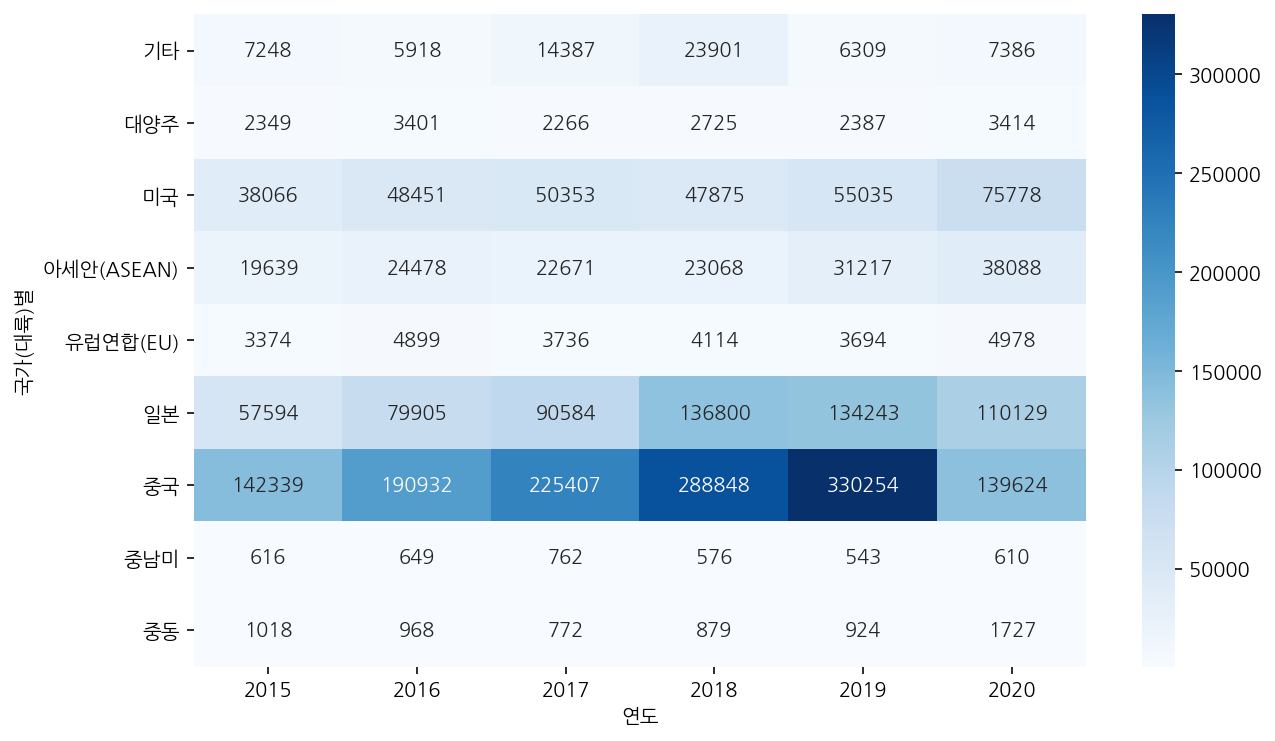

In [68]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap = "Blues", annot = True, fmt = ".0f")

### 면세점 제외 시각화

In [74]:
df_fashion3 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "면세점")].copy()
df_fashion3.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2015 1/4,8602.0,2015,1
68,미국,의류 및 패션 관련상품,면세점 이외,2015 1/4,NaN,2015,1
111,중국,의류 및 패션 관련상품,계,2015 1/4,29737.0,2015,1
113,중국,의류 및 패션 관련상품,면세점 이외,2015 1/4,NaN,2015,1
156,일본,의류 및 패션 관련상품,계,2015 1/4,12456.0,2015,1


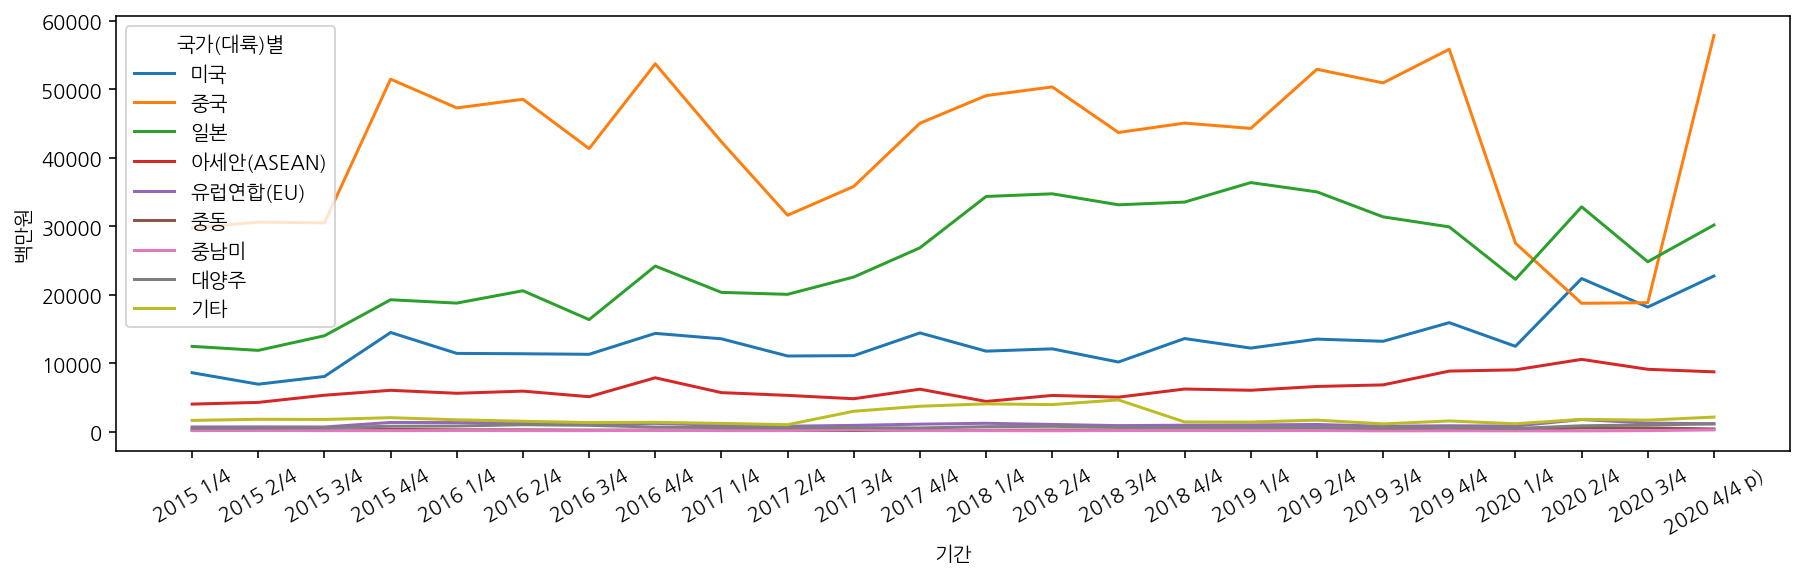

In [80]:
plt.figure(figsize=(15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion3, x = "기간", y = "백만원", hue = "국가(대륙)별", ci = None)

In [77]:
result2 = df_fashion3.pivot_table(index = "국가(대륙)별", columns = "연도", 
                       values = "백만원", aggfunc = "sum")
result2

연도,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,
기타,7248.0,5918.0,17777.0,28096.0,11514.0,13466.0
대양주,2349.0,3401.0,4527.0,5435.0,4745.0,6825.0
미국,38066.0,48451.0,100244.0,95228.0,109659.0,151503.0
아세안(ASEAN),19639.0,24478.0,43978.0,41897.0,56607.0,74829.0
유럽연합(EU),3374.0,4899.0,7427.0,8153.0,7324.0,9948.0
일본,57594.0,79905.0,179669.0,271542.0,265387.0,220179.0
중국,142339.0,190932.0,309655.0,376459.0,408085.0,245970.0
중남미,616.0,649.0,1524.0,1152.0,1086.0,1220.0
중동,1018.0,968.0,1544.0,1755.0,1848.0,3454.0


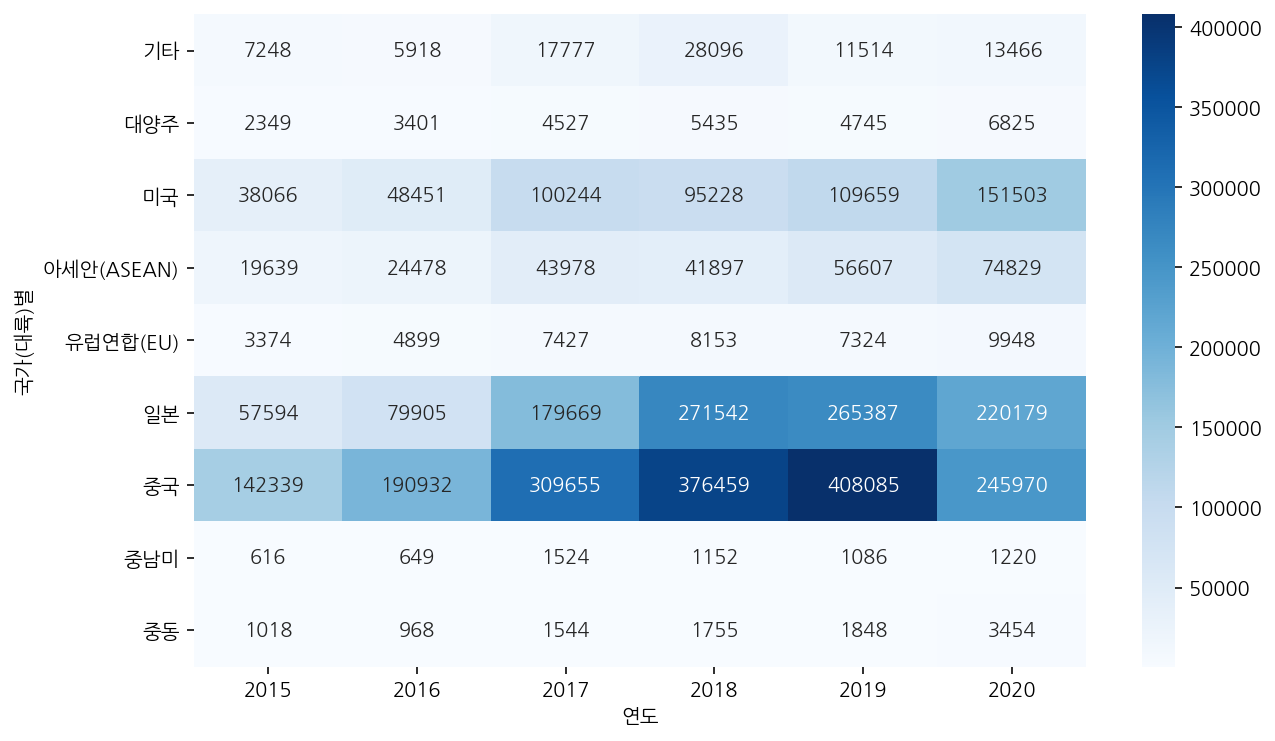

In [78]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(result2, cmap = "Blues", annot = True, fmt = ".0f")

# 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했는가?

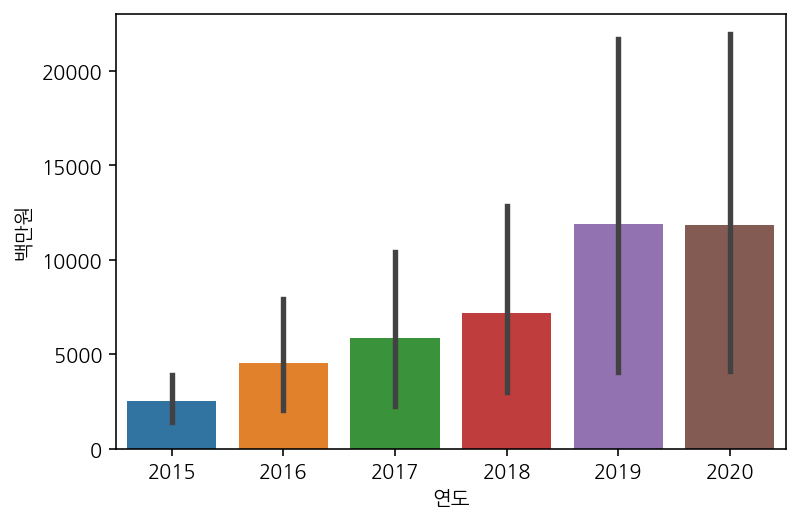

In [81]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화
sns.barplot(data = df_total, x = "연도", y = "백만원")

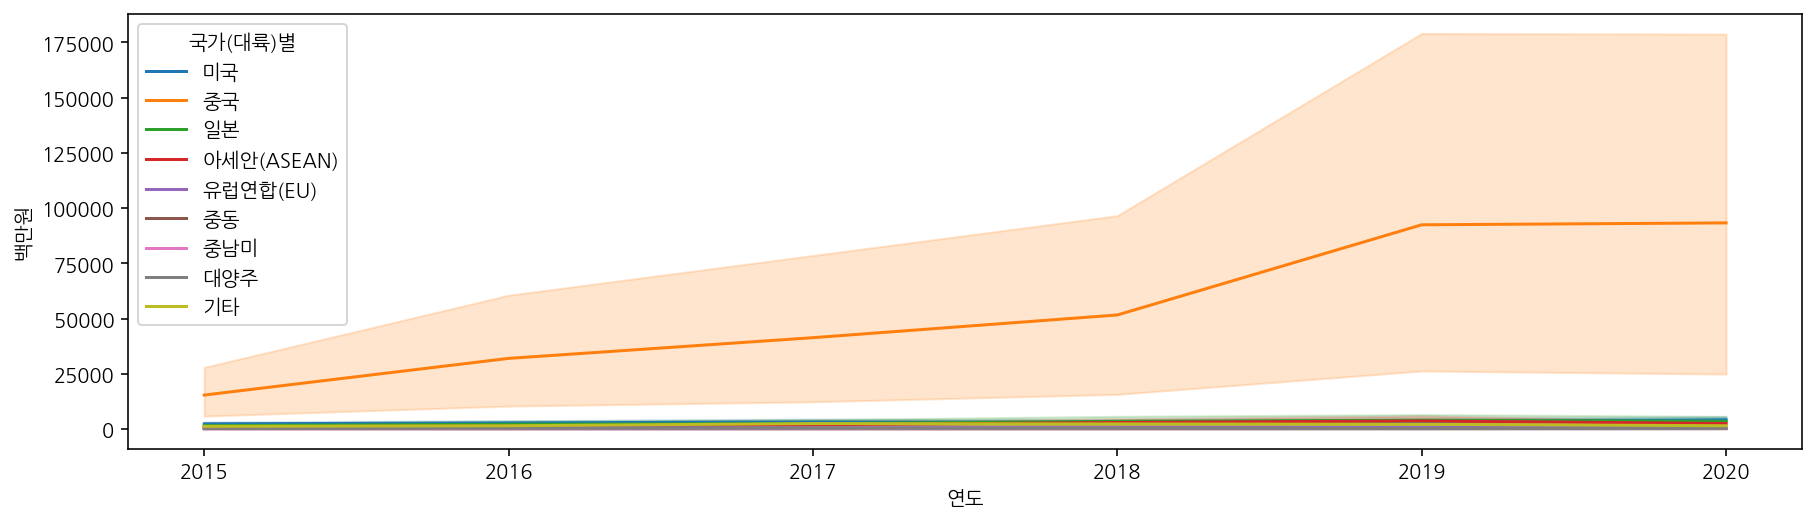

In [83]:
# 연도별 판매금액을 그리고 "국가(대륙)별"로 다른 색상으로 표현
plt.figure(figsize=(15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "국가(대륙)별")

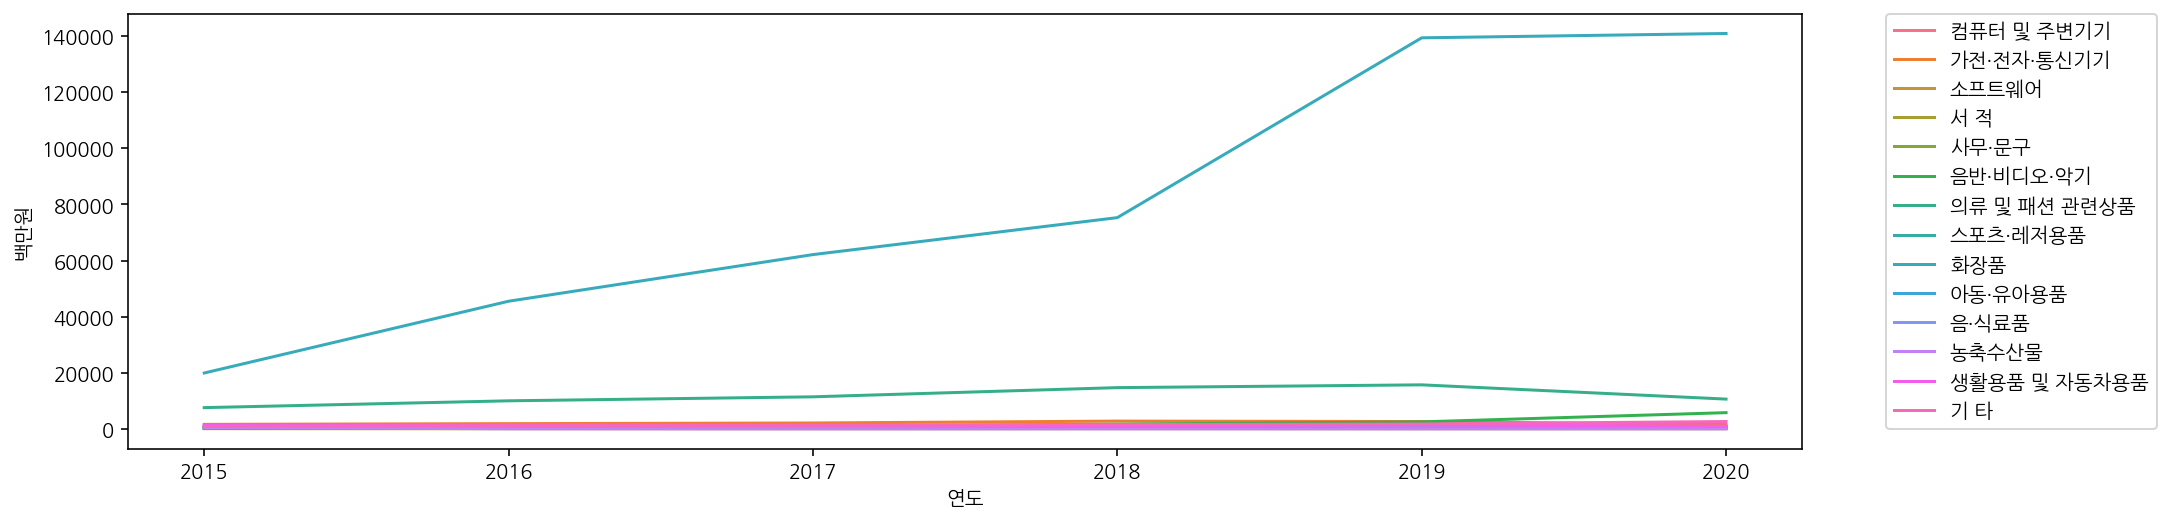

In [89]:
# 연도별 판매액 시각화 및 "상품군별"로 다른 색상으로 표현
plt.figure(figsize=(15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별", ci = None)
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad = 0.)